# Credit Scoring Modelling Version 0 (One-step) (11/16)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./processed.csv')
df

,Customer_ID,Month,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,576,1,1,7.509249,3.0,4.0,3.0,0,3.0,7.0,...,2,28.460148,26.822620,1,1,49.574949,21.465380,2,312.494089,2
1,576,2,1,7.509249,3.0,4.0,3.0,0,3.0,4.0,...,2,28.460148,31.944960,1,1,49.574949,21.465380,3,284.629162,2
2,576,3,1,7.509249,3.0,4.0,3.0,0,3.0,7.0,...,2,28.460148,28.609352,1,1,49.574949,21.465380,4,331.209863,2
3,576,4,1,7.509249,3.0,4.0,3.0,0,5.0,4.0,...,2,28.460148,31.377862,1,1,49.574949,21.465380,5,223.451310,2
4,576,5,1,7.509249,3.0,4.0,3.0,0,6.0,4.0,...,2,28.460148,24.797347,1,1,49.574949,21.465380,1,341.489231,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,9254,4,1,8.119522,4.0,6.0,7.0,0,23.0,7.0,...,2,22.413835,34.663572,1,1,35.104023,24.028477,0,479.866228,0
99996,9254,5,1,8.119522,4.0,6.0,7.0,0,18.0,7.0,...,2,22.413835,40.565631,1,1,35.104023,24.028477,1,496.651610,0
99997,9254,6,1,8.119522,4.0,6.0,7.0,0,27.0,6.0,...,2,22.413835,41.255522,1,1,35.104023,24.028477,0,516.809083,0
99998,9254,7,1,8.119522,4.0,6.0,7.0,0,20.0,6.0,...,2,22.413835,33.638208,1,1,35.104023,24.028477,3,319.164979,1


## DL

### LSTM

In [3]:
df_dl = df.copy()

In [4]:
for col in df_dl.iloc[:, :-1].columns[df_dl.iloc[:, :-1].dtypes != 'float']:
    df_dl[col] = df_dl[col].astype(np.float64)

In [5]:
df_dl.dtypes

Customer_ID                 float64
Month                       float64
Age                         float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                  float64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount       float64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour           float64
Monthly_Balance             float64
Credit_Score                  int64
dtype: object

In [6]:
df_dl.select_dtypes('int')

,Credit_Score
0,2
1,2
2,2
3,2
4,2
...,...
99995,0
99996,0
99997,0
99998,1


In [7]:
train_df = df_dl[df_dl['Month'] <= 7]
test_df = df_dl[df_dl['Month'] > 7]

print(train_df.shape)
print(test_df.shape)

(87500, 22)
(12500, 22)


In [8]:
train_df

,Customer_ID,Month,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,576.0,1.0,1.0,7.509249,3.0,4.0,3.0,0.0,3.0,7.0,...,2.0,28.460148,26.822620,1.0,1.0,49.574949,21.465380,2.0,312.494089,2
1,576.0,2.0,1.0,7.509249,3.0,4.0,3.0,0.0,3.0,4.0,...,2.0,28.460148,31.944960,1.0,1.0,49.574949,21.465380,3.0,284.629162,2
2,576.0,3.0,1.0,7.509249,3.0,4.0,3.0,0.0,3.0,7.0,...,2.0,28.460148,28.609352,1.0,1.0,49.574949,21.465380,4.0,331.209863,2
3,576.0,4.0,1.0,7.509249,3.0,4.0,3.0,0.0,5.0,4.0,...,2.0,28.460148,31.377862,1.0,1.0,49.574949,21.465380,5.0,223.451310,2
4,576.0,5.0,1.0,7.509249,3.0,4.0,3.0,0.0,6.0,4.0,...,2.0,28.460148,24.797347,1.0,1.0,49.574949,21.465380,1.0,341.489231,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,9254.0,3.0,1.0,8.119522,4.0,6.0,7.0,0.0,20.0,6.0,...,2.0,22.413835,39.323569,1.0,1.0,35.104023,24.028477,1.0,410.256158,0
99995,9254.0,4.0,1.0,8.119522,4.0,6.0,7.0,0.0,23.0,7.0,...,2.0,22.413835,34.663572,1.0,1.0,35.104023,24.028477,0.0,479.866228,0
99996,9254.0,5.0,1.0,8.119522,4.0,6.0,7.0,0.0,18.0,7.0,...,2.0,22.413835,40.565631,1.0,1.0,35.104023,24.028477,1.0,496.651610,0
99997,9254.0,6.0,1.0,8.119522,4.0,6.0,7.0,0.0,27.0,6.0,...,2.0,22.413835,41.255522,1.0,1.0,35.104023,24.028477,0.0,516.809083,0


In [9]:
X_train, y_train = train_df.iloc[:, :-1], train_df.iloc[:, -1]
X_test, y_test = test_df.iloc[:, :-1], test_df.iloc[:, -1]

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(87500, 21)
(87500,)
(12500, 21)
(12500,)


In [10]:
X_train

,Customer_ID,Month,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,576.0,1.0,1.0,7.509249,3.0,4.0,3.0,0.0,3.0,7.0,...,4.0,2.0,28.460148,26.822620,1.0,1.0,49.574949,21.465380,2.0,312.494089
1,576.0,2.0,1.0,7.509249,3.0,4.0,3.0,0.0,3.0,4.0,...,4.0,2.0,28.460148,31.944960,1.0,1.0,49.574949,21.465380,3.0,284.629162
2,576.0,3.0,1.0,7.509249,3.0,4.0,3.0,0.0,3.0,7.0,...,4.0,2.0,28.460148,28.609352,1.0,1.0,49.574949,21.465380,4.0,331.209863
3,576.0,4.0,1.0,7.509249,3.0,4.0,3.0,0.0,5.0,4.0,...,4.0,2.0,28.460148,31.377862,1.0,1.0,49.574949,21.465380,5.0,223.451310
4,576.0,5.0,1.0,7.509249,3.0,4.0,3.0,0.0,6.0,4.0,...,4.0,2.0,28.460148,24.797347,1.0,1.0,49.574949,21.465380,1.0,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,9254.0,3.0,1.0,8.119522,4.0,6.0,7.0,0.0,20.0,6.0,...,3.0,2.0,22.413835,39.323569,1.0,1.0,35.104023,24.028477,1.0,410.256158
99995,9254.0,4.0,1.0,8.119522,4.0,6.0,7.0,0.0,23.0,7.0,...,3.0,2.0,22.413835,34.663572,1.0,1.0,35.104023,24.028477,0.0,479.866228
99996,9254.0,5.0,1.0,8.119522,4.0,6.0,7.0,0.0,18.0,7.0,...,3.0,2.0,22.413835,40.565631,1.0,1.0,35.104023,24.028477,1.0,496.651610
99997,9254.0,6.0,1.0,8.119522,4.0,6.0,7.0,0.0,27.0,6.0,...,3.0,2.0,22.413835,41.255522,1.0,1.0,35.104023,24.028477,0.0,516.809083


In [12]:
timesteps = 7
num_features = X_train.shape[-1]
sample_size = X_train.shape[0]

X_train_reshape = np.reshape(X_train.values, newshape=(12500, timesteps, num_features))
X_test_reshape = np.reshape(X_test.values, newshape=(12500, 1, num_features))

print(X_train_reshape.shape)
print(X_test_reshape.shape)

(12500, 7, 21)
(12500, 1, 21)


In [13]:
import tensorflow as tf
from time import time
from datetime import timedelta
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# loss와 accuracy 시각화를 위한 함수 정의
def plot_loss(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], 'b-', label='loss')
    plt.plot(history.history['val_loss'], 'g--', label='val_loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs Val Loss')
    plt.legend()
    plt.show()

def plot_acc(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['acc'], 'b-', label='acc')
    plt.plot(history.history['val_acc'], 'g--', label='val_acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Val Accuracy')
    plt.legend()
    plt.show()

In [16]:
# 결과 재활용을 위한 시드 설정 함수 정의
import random
def set_seed(seed: int = 42) -> None:
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.experimental.numpy.random.seed(seed)
    # When running on the CuDNN backend, two further options must be set
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    # Set a fixed value for the hash seed
    os.environ["PYTHONHASHSEED"] = str(seed)
    print(f"Random seed set as {seed}")

In [17]:
# 분류모델 결과 평가를 위한 혼동행렬 리포트 & 시각화 함수 정의
def clf_report_plot(y_true, X_test, model):

    result = model.predict(X_test)

    y_pred = []
    for pred in result:
        y_pred.append(np.argmax(pred))

    print(classification_report(y_true, y_pred, digits=4))

    # plt.rc('font', family='NanumGothicOTF') # For MacOS
    plt.rc('font', family='NanumGothic') # For Windows

    ax = plt.subplot()
    ax.figure.set_size_inches(10, 10)
    cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', ax=ax)

    ax.set_title('Confusion Matrix',fontsize=20, y=1.05)
    ax.set_xlabel('Predicted Labels', fontsize=15)
    ax.set_ylabel('True Labels', fontsize=15)

    ax.xaxis.set_ticklabels(['Poor', 'Standard', 'Good'])
    ax.yaxis.set_ticklabels(['Poor', 'Standard', 'Good'])
    plt.show()

In [18]:
from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras.layers import Embedding, Dense, LSTM, RNN, Flatten, SimpleRNN
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Input

from tensorflow.keras.initializers import GlorotUniform

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import confusion_matrix, classification_report

In [19]:
import os

In [23]:
set_seed(42)
model = Sequential()
# model.add(LSTM(128, batch_input_shape=(12500, 6, 21)))
model.add(LSTM(128, input_shape=(7, 21), return_sequences=True))
model.add(LSTM(128))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))
model.summary()

Random seed set as 42
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 7, 128)            76800     
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
Total params: 216,835
Trainable 

In [24]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('lstm_best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [25]:
print('Algorithm starts learning.....')
start_time = time()

history = model.fit(X_train_reshape, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[es, mc] )

print("Learning Durations: ", timedelta(seconds=(time() - start_time)))

Algorithm starts learning.....
Epoch 1/50


2022-11-16 18:43:31.041995: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-16 18:43:31.325493: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-16 18:43:32.644997: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-16 18:43:35.599652: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-16 18:43:36.248037: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


157/157 [==============================] - ETA: 0s - loss: 1.0237 - acc: 0.5161

2022-11-16 18:43:39.899586: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-16 18:43:39.957418: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-16 18:43:39.995517: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_acc improved from -inf to 0.53760, saving model to lstm_best_model.h5
157/157 [==============================] - 11s 29ms/step - loss: 1.0237 - acc: 0.5161 - val_loss: 0.9986 - val_acc: 0.5376
Epoch 2/50
157/157 [==============================] - ETA: 0s - loss: 1.0162 - acc: 0.5192
Epoch 2: val_acc did not improve from 0.53760
157/157 [==============================] - 3s 21ms/step - loss: 1.0162 - acc: 0.5192 - val_loss: 1.0032 - val_acc: 0.5376
Epoch 3/50
157/157 [==============================] - ETA: 0s - loss: 1.0143 - acc: 0.5218
Epoch 3: val_acc did not improve from 0.53760
157/157 [==============================] - 3s 21ms/step - loss: 1.0143 - acc: 0.5218 - val_loss: 0.9968 - val_acc: 0.5376
Epoch 4/50
157/157 [==============================] - ETA: 0s - loss: 1.0130 - acc: 0.5218
Epoch 4: val_acc did not improve from 0.53760
157/157 [==============================] - 3s 21ms/step - loss: 1.0130 - acc: 0.5218 - val_loss: 0.9981 - val_acc: 0.5376
Epoch 5/50
157/1

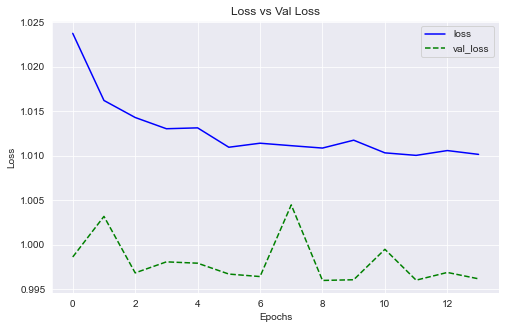

In [26]:
plot_loss(history)

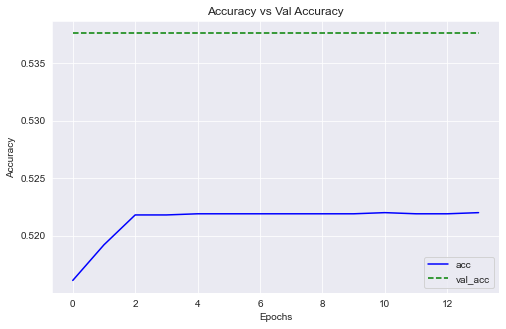

In [27]:
plot_acc(history)

## ML

In [28]:
from sklearn.model_selection import RandomizedSearchCV

In [29]:
from time import time
from datetime import timedelta

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# 분류모델 결과 평가를 위한 혼동행렬 리포트 & 시각화 함수 정의
def clf_report_plot(y_true, X_test, model):

    y_pred = model.predict(X_test)

    # for pred in result:
    #     y_pred.append(np.argmax(pred))

    print(classification_report(y_true, y_pred, digits=4))

    # plt.rc('font', family='NanumGothicOTF') # For MacOS
    plt.rc('font', family='NanumGothic') # For Windows

    ax = plt.subplot()
    ax.figure.set_size_inches(10, 10)
    cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', ax=ax)

    ax.set_title('Confusion Matrix',fontsize=20, y=1.05)
    ax.set_xlabel('Predicted Labels', fontsize=15)
    ax.set_ylabel('True Labels', fontsize=15)

    ax.xaxis.set_ticklabels(['Poor', 'Standard', 'Good'])
    ax.yaxis.set_ticklabels(['Poor', 'Standard', 'Good'])
    plt.show()

### NB

In [31]:
from sklearn.naive_bayes import MultinomialNB

In [32]:
mnb = MultinomialNB()

In [33]:
mnb.fit(X_train, y_train)

MultinomialNB()

In [34]:
mnb.score(X_test, y_test)

0.42696

### RF

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rfc = RandomForestClassifier(n_jobs=-1, random_state=42)

rf_params = {
    'n_estimators': np.arange(100, 1500, 300),
    'class_weight': [None, 'balanced', 'balanced_subsample'],
}

In [37]:
clf = RandomizedSearchCV(rfc, rf_params, random_state=42)
clf.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   param_distributions={'class_weight': [None, 'balanced',
                                                         'balanced_subsample'],
                                        'n_estimators': array([ 100,  400,  700, 1000, 1300])},
                   random_state=42)

In [38]:
clf.best_estimator_

RandomForestClassifier(n_estimators=1300, n_jobs=-1, random_state=42)

In [39]:
rf = clf.best_estimator_

In [40]:
clf.score(X_test, y_test)

0.77816

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


              precision    recall  f1-score   support

           0     0.7722    0.7979    0.7848      3602
           1     0.7850    0.7906    0.7878      6485
           2     0.7681    0.7153    0.7408      2413

    accuracy                         0.7782     12500
   macro avg     0.7751    0.7679    0.7711     12500
weighted avg     0.7781    0.7782    0.7779     12500



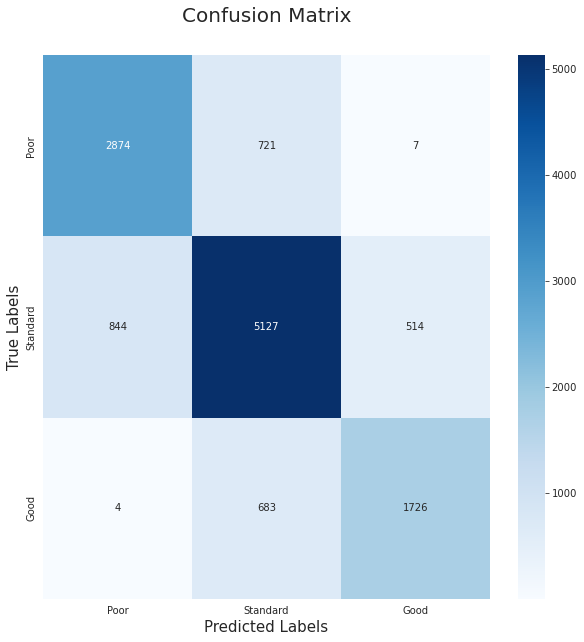

In [41]:
clf_report_plot(y_test, X_test, clf)

### XGBoost

In [42]:
# from xgboost import XGBClassifier
# from dask.diagnostics import ProgressBar

In [43]:
# xgb = XGBClassifier(verbose=1, n_jobs=-1, random_state=42)
#
# xgb_params = {
#     'n_estimators': np.arange(100, 1600, 500),
#     'max_depth': [0, 3, 5, 10, 15],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
#     'subsample': np.arange(5, 11)/10
# }

In [44]:
# clf = RandomizedSearchCV(xgb, xgb_params, random_state=42)
#
# start_time = time()
# with ProgressBar():
#     clf.fit(X_train, y_train)
#
# print("Learning Durations: ", timedelta(seconds=(time() - start_time)))

In [45]:
# xgb = clf.best_estimator_

In [46]:
# clf.score(X_train, y_train)

In [47]:
# clf.score(X_test, y_test)

In [48]:
# clf_report_plot(y_test, X_test, clf)

### LGBM

In [49]:
from lightgbm import LGBMClassifier

In [52]:
from dask.diagnostics import ProgressBar

In [50]:
lgb = LGBMClassifier(n_jobs=-1, random_state=42)
lgb_params = {
    'learning_rate': np.arange(5, 10) / 100,
    'n_estimators': np.arange(100, 1100),
    'num_leaves': [10, 20, 30, 40, 50],
    'max_depth': [-1, 5, 10, 15],
    'boosting': ['gbdt','rf']
}

In [53]:
clf = RandomizedSearchCV(lgb, lgb_params, n_iter=15, random_state=42)

start_time = time()
with ProgressBar():
    clf.fit(X_train, y_train)

print("Learning Durations: ", timedelta(seconds=(time() - start_time)))

[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf


[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1665453933763/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1665453933763/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1665453933763/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1665453933763/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && con

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf


[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1665453933763/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1665453933763/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1665453933763/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1665453933763/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && con

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf


[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1665453933763/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1665453933763/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1665453933763/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1665453933763/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && con

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt


/Users/ben/miniforge3/envs/tf_mini/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ben/miniforge3/envs/tf_mini/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ben/miniforge3/envs/tf_mini/lib/python3.8/site-packages/lightgbm/sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "/Users/ben/miniforge3/envs/tf_mini/lib/python3.8/site-pa

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
Learning Durations:  0:08:08.673775


In [54]:
lgb = clf.best_estimator_

In [55]:
clf.score(X_test, y_test)

0.71512

              precision    recall  f1-score   support

           0     0.7202    0.6932    0.7065      3602
           1     0.7266    0.7473    0.7368      6485
           2     0.6751    0.6614    0.6682      2413

    accuracy                         0.7151     12500
   macro avg     0.7073    0.7006    0.7038     12500
weighted avg     0.7148    0.7151    0.7148     12500



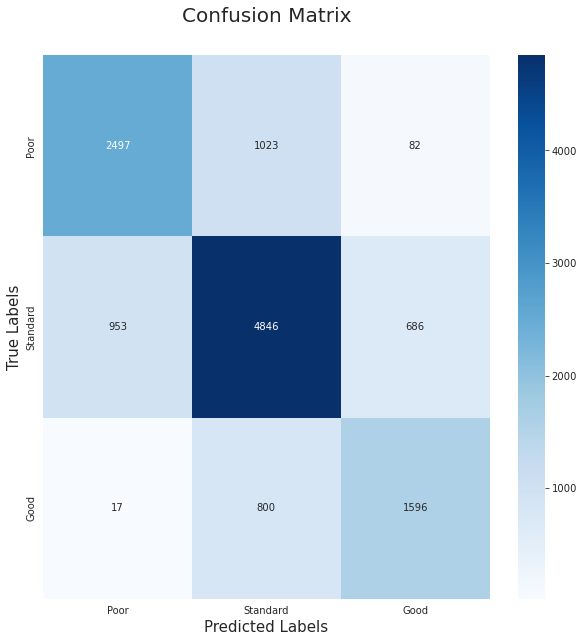

In [56]:
clf_report_plot(y_test, X_test, clf)

### Catboost

In [57]:
from catboost import CatBoostClassifier

In [58]:
cbc = CatBoostClassifier(random_state=42)

cb_params = {
    'iterations': np.arange(100, 1000, 100),
    'max_depth': np.arange(3, 15, 3),
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5]
}

In [59]:
clf = RandomizedSearchCV(cbc, cb_params, n_iter=10, random_state=42)

start_time = time()
with ProgressBar():
    clf.fit(X_train, y_train)

print("Learning Durations: ", timedelta(seconds=(time() - start_time)))

0:	learn: 0.7964805	total: 242ms	remaining: 24s
1:	learn: 0.7094367	total: 328ms	remaining: 16.1s
2:	learn: 0.6579878	total: 397ms	remaining: 12.8s
3:	learn: 0.6322559	total: 480ms	remaining: 11.5s
4:	learn: 0.6136878	total: 677ms	remaining: 12.9s
5:	learn: 0.5971994	total: 810ms	remaining: 12.7s
6:	learn: 0.5825037	total: 935ms	remaining: 12.4s
7:	learn: 0.5684089	total: 1.1s	remaining: 12.7s
8:	learn: 0.5614608	total: 1.18s	remaining: 11.9s
9:	learn: 0.5438730	total: 1.33s	remaining: 12s
10:	learn: 0.5366299	total: 1.48s	remaining: 12s
11:	learn: 0.5250046	total: 1.54s	remaining: 11.3s
12:	learn: 0.5201524	total: 1.62s	remaining: 10.9s
13:	learn: 0.5101812	total: 1.69s	remaining: 10.4s
14:	learn: 0.5034799	total: 1.76s	remaining: 9.96s
15:	learn: 0.4979801	total: 1.82s	remaining: 9.57s
16:	learn: 0.4899062	total: 1.88s	remaining: 9.2s
17:	learn: 0.4799040	total: 1.95s	remaining: 8.88s
18:	learn: 0.4695613	total: 2.02s	remaining: 8.61s
19:	learn: 0.4603580	total: 2.09s	remaining: 8.37

In [60]:
cbc = clf.best_estimator_

In [61]:
clf.score(X_train, y_train)

0.7259428571428571

In [62]:
clf.score(X_test, y_test)

0.64296

              precision    recall  f1-score   support

           0     0.6741    0.5841    0.6259      3602
           1     0.6758    0.6908    0.6832      6485
           2     0.5284    0.6022    0.5629      2413

    accuracy                         0.6430     12500
   macro avg     0.6261    0.6257    0.6240     12500
weighted avg     0.6469    0.6430    0.6435     12500



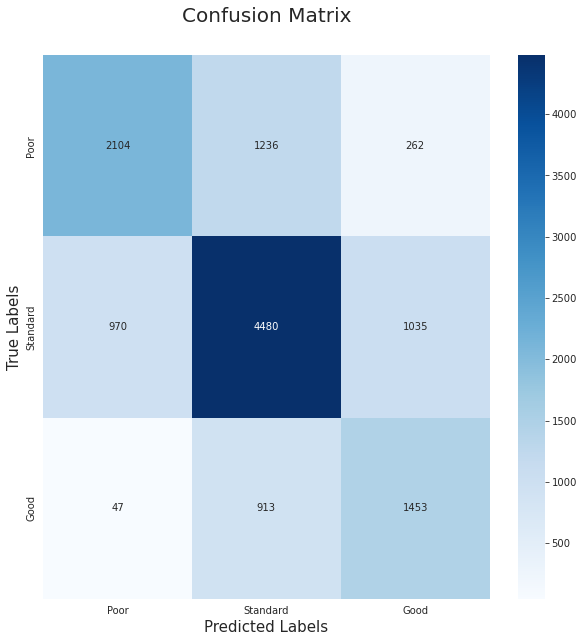

In [63]:
clf_report_plot(y_test, X_test, clf)

### Stacking

In [64]:
from sklearn.ensemble import StackingClassifier

In [65]:
model = StackingClassifier([
    ('randomforest', rf),
    # ('xgb', xgb),
    ('lgb', lgb),
    ('cbc', cbc)
], n_jobs=-1)

In [66]:
model.fit(X_train, y_train)

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
0:	learn: 1.0904473	total: 183ms	remaining: 54.7s
1:	learn: 1.0828094	total: 252ms	remaining: 37.5s
2:	learn: 1.0753926	total: 417ms	remaining: 41.3s
3:	learn: 1.0679626	total: 637ms	remaining: 47.2s
4:	learn: 1.0607672	total: 858ms	remaining: 50.6s
5:	learn: 1.0537382	total: 1.04s	remaining: 50.9s
6:	learn: 1.0469397	total: 1.2s	remaining: 50.4s
7:	learn: 1.0401106	total: 1.43s	remaining: 52.3s
8:	learn: 1.0339430	total: 1.6s	remaining: 51.9s
9:	learn: 1.

StackingClassifier(estimators=[('randomforest',
                                RandomForestClassifier(n_estimators=1300,
                                                       n_jobs=-1,
                                                       random_state=42)),
                               ('lgb',
                                LGBMClassifier(boosting='gbdt',
                                               learning_rate=0.05, max_depth=15,
                                               n_estimators=304, num_leaves=40,
                                               random_state=42)),
                               ('cbc',
                                <catboost.core.CatBoostClassifier object at 0x2d945da90>)],
                   n_jobs=-1)

In [67]:
print("Train Score: ", model.score(X_train, y_train))

Train Score:  0.8783885714285714


In [68]:
print("Test Score: ", model.score(X_test, y_test))

Test Score:  0.7204


              precision    recall  f1-score   support

           0     0.7316    0.6780    0.7037      3602
           1     0.7175    0.7823    0.7485      6485
           2     0.7122    0.6175    0.6615      2413

    accuracy                         0.7204     12500
   macro avg     0.7205    0.6926    0.7046     12500
weighted avg     0.7206    0.7204    0.7188     12500



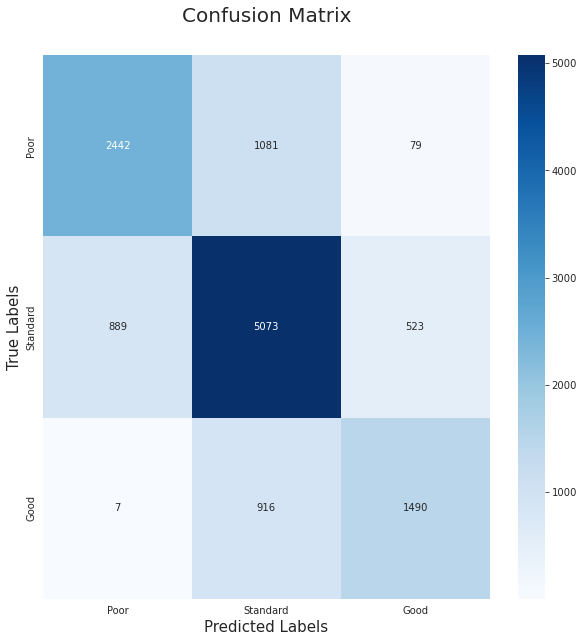

In [69]:
clf_report_plot(y_test, X_test, model)